# Download data

In [10]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

_URL = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
path_to_zip = tf.keras.utils.get_file("cat_and_dogs.zip", origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), "cats_and_dogs_filtered")

train_dir = os.path.join(PATH, "train")
validation_dir = os.path.join(PATH, "validation")

# Define funtion generating data generator

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def ImageDataGenerate(train_dir, validation_dir):

    batch_size = 32
    IMG_HEIGHT = 224
    IMG_WIDTH = 224

    """data generator"""
    train_image_generator = ImageDataGenerator(
        rescale=1./255,
        rotation_range=15,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode="nearest",
        width_shift_range=0.1,
        height_shift_range=0.1,
    )

    validation_image_generator = ImageDataGenerator(rescale=1./255)

    """data"""
    train_data_gen = train_image_generator.flow_from_directory(
        batch_size=batch_size,
        directory=train_dir,
        shuffle=True,
        target_size=(IMG_HEIGHT,IMG_WIDTH),
        class_mode="binary",
    )

    val_data_gen = validation_image_generator.flow_from_directory(
        batch_size=batch_size,
        directory=validation_dir,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        class_mode="binary",
    )

    return train_data_gen, val_data_gen



# Create function that make and run the model

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, MaxPooling2D, Flatten
from tensorflow.keras import optimizers

def train_CNN(train_data_gen, val_data_gen):
    """
    Returns: hisory
    """
    image_size = len(train_data_gen[0][0][0])
    input_shape = (image_size, image_size, 3)
    batch_size = len(train_data_gen[0][0])
    total_train = len(train_data_gen) * batch_size
    total_validate = len(val_data_gen) * batch_size

    model = Sequential()

    model.add(
        Conv2D(
            filters=32,
            kernel_size=(3,3),
            input_shape=input_shape,
            padding="same",
            activation="relu",
        )
    )

    model.add(
        MaxPooling2D(pool_size=(2,2))
    )

    model.add(
        Dropout(0.25)
    )

    model.add(
        Conv2D(
            filters=32,
            kernel_size=(3, 3),
            activation="relu",
        )
    )

    model.add(
        MaxPooling2D(pool_size=(2,2))
    )

    model.add(
        Dropout(0.25)
        )

    model.add(
        Conv2D(
            filters=64,
            kernel_size=(3,3),
            activation="relu",
        )
    )

    model.add(
        MaxPooling2D(pool_size=(2,2))
    )

    model.add(
        Dropout(0.25)
    )

    model.add(
        Flatten()
        )
    
    model.add(
        Dense(
            64,
            activation="relu"
        )
    )

    model.add(
        Dropout(0.5)
        )

    model.add(
        Dense(
            1,
            activation="sigmoid",
        )
    )

    model.compile(
        loss = "binary_crossentropy",
        metrics=["accuracy"],
        optimizer=optimizers.Adam(),
    )

    model.summary()

    epochs = 60
    history = model.fit(
        train_data_gen,
        epochs=epochs,
        validation_data=val_data_gen,
        validation_steps=total_validate // batch_size,
        steps_per_epoch=total_train // batch_size,
        verbose=1
    )

    return history


# Learning

In [13]:

train_data_gen, val_data_gen = ImageDataGenerate(train_dir=train_dir, validation_dir=validation_dir)
history = train_CNN(train_data_gen, val_data_gen)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 112, 112, 32)      0         
                                                                 
 conv2d_10 (Conv2D)          (None, 110, 110, 32)      9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 55, 55, 32)       0         
 g2D)                                                            
                                    

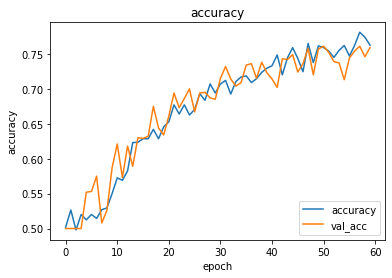

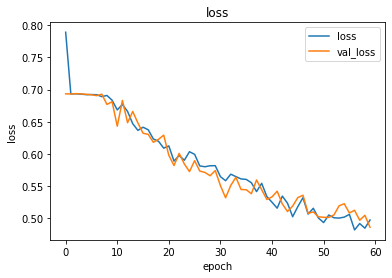

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_acc_loss(history):
    plt.plot(history.history["accuracy"],"-",label="accuracy")
    plt.plot(history.history["val_accuracy"],"-",label="val_acc")
    plt.title("accuracy")
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.legend(loc="lower right")
    plt.show()

    plt.plot(history.history["loss"],"-",label="loss")
    plt.plot(history.history["val_loss"],"-",label="val_loss")
    plt.title("loss")
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.legend(loc="upper right")
    plt.show()

plot_acc_loss(history)
